# Import thư viện và bộ dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Datasets/flights_sample_3m.csv")

df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [3]:
print(df.isna().sum())

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

# Xử lý missing value

In [4]:
# Điền missing trong DEP_DELAY và ARR_DELAY bằng 0 (báo hiệu không chậm)
df['DEP_DELAY'] = df['DEP_DELAY'].fillna(0)
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(0)

# Điền missing giờ khởi hành và đến bằng thời gian dự kiến
df['DEP_TIME'] = df['DEP_TIME'].fillna(df['CRS_DEP_TIME'])
df['ARR_TIME'] = df['ARR_TIME'].fillna(df['CRS_ARR_TIME'])

In [5]:
delay_cols = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

# Điền 0 cho các nguyên nhân delay khi giá trị missing (nghĩa là không có delay nguyên nhân này)
df[delay_cols] = df[delay_cols].fillna(0)
print(df.isna().sum())
df

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                         0
DEP_DELAY                        0
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                         0
ARR_DELAY                        0
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER                0
DELAY_DUE_WEATHER   

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.0,85.0,71.0,55.0,328.0,0.0,0.0,0.0,0.0,0.0
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.0,176.0,145.0,130.0,977.0,0.0,0.0,0.0,0.0,0.0
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.0,88.0,77.0,50.0,184.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(df.isna().sum())

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                         0
DEP_DELAY                        0
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                         0
ARR_DELAY                        0
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER                0
DELAY_DUE_WEATHER   

Xử lý cột lý do hủy chuyến

Chỉ chuyến hủy mới có lý do hủy. 

Các bản ghi khác missing, ta thay bằng 'NONE' để tránh nhầm lẫn khi phân nhóm hoặc thống kê.



In [7]:
# Điền 'NONE' cho các bản ghi không bị hủy (giá trị missing trong CANCELLATION_CODE)
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].fillna('NONE')

# Thêm cột "Giờ bay dự kiến"
df['CRS_DEP_HOUR'] = df['CRS_DEP_TIME'] // 100



In [ ]:
# Xử lý tất cả cột taxi/wheels bằng transform()
cols_to_fill = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_OFF', 'WHEELS_ON']

for col in cols_to_fill:
    if 'OUT' in col or 'OFF' in col:
        df[col] = df.groupby(['ORIGIN', 'CRS_DEP_HOUR'])[col].transform(lambda x: x.fillna(x.median()))
    else:  # IN, ON
        df[col] = df.groupby(['DEST', 'CRS_DEP_HOUR'])[col].transform(lambda x: x.fillna(x.median()))

# Do vẫn còn các ô bị khuyết nên quyết dịnh fill bằng median của tổng thể
for col in cols_to_fill:
    med = df[col].median()
    df[col] = df[col].fillna(med)

print(df[cols_to_fill].isna().sum())  # Tất cả should = 0


TAXI_OUT      0
TAXI_IN       0
WHEELS_OFF    0
WHEELS_ON     0
dtype: int64


**CRS_ELAPSED_TIME chỉ missing 2.8732666667% nên drop luôn các hàng bị missing để quá trình phân tích được tốt nhất**

In [11]:
df = df.dropna(subset='CRS_ELAPSED_TIME')

In [28]:
print(df.isna().sum())

FL_DATE                    0
AIRLINE                    0
AIRLINE_DOT                0
AIRLINE_CODE               0
DOT_CODE                   0
FL_NUMBER                  0
ORIGIN                     0
ORIGIN_CITY                0
DEST                       0
DEST_CITY                  0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                  0
CANCELLED                  0
CANCELLATION_CODE          0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
CRS_DEP_HOUR               0
dtype: int64


In [27]:
# 1. Bao nhiêu dòng trong số đó bị hủy/chuyển hướng?
mask_na_time = df['ELAPSED_TIME'].isna() | df['AIR_TIME'].isna()

print('Tổng NaN ELAPSED_TIME:', df['ELAPSED_TIME'].isna().sum())
print('Tổng NaN AIR_TIME    :', df['AIR_TIME'].isna().sum())

print('\nTrong đó CANCELLED == 1:')
print((mask_na_time & (df['CANCELLED'] == 1)).sum())

print('\nTrong đó DIVERTED == 1:')
print((mask_na_time & (df['DIVERTED'] == 1)).sum())

print('\nVí dụ vài dòng:')
print(df.loc[mask_na_time, 
             ['FL_DATE','AIRLINE','ORIGIN','DEST',
              'CANCELLED','DIVERTED',
              'DEP_TIME','ARR_TIME',
              'ELAPSED_TIME','AIR_TIME']].head(10))


Tổng NaN ELAPSED_TIME: 0
Tổng NaN AIR_TIME    : 0

Trong đó CANCELLED == 1:
0

Trong đó DIVERTED == 1:
0

Ví dụ vài dòng:
Empty DataFrame
Columns: [FL_DATE, AIRLINE, ORIGIN, DEST, CANCELLED, DIVERTED, DEP_TIME, ARR_TIME, ELAPSED_TIME, AIR_TIME]
Index: []


1. Vì sao `ELAPSED_TIME`, `AIR_TIME` còn `NaN`?
Hai cột này phụ thuộc mạnh vào việc chuyến bay có thực sự bay hay không:​

`ELAPSED_TIME`: thời gian bay thực tế từ cất cánh đến hạ cánh (bao gồm thời gian trên không + taxi in/out, tùy định nghĩa bộ dữ liệu).

`AIR_TIME`: thời gian máy bay thực sự ở trên không (từ `WHEELS_OFF` đến `WHEELS_ON`).

Các trường hợp thường bị NaN:

Chuyến bị hủy (`CANCELLED == 1`) → không có `ELAPSED_TIME`, `AIR_TIME`.

Chuyến bị chuyển hướng nghiêm trọng hoặc mất dữ liệu log → thiếu giờ `WHEELS_OFF` / `WHEELS_ON` → không tính được `AIR_TIME`/`ELAPSED_TIME`.

Một số bản ghi lỗi dữ liệu gốc (BTS cũng có một tỷ lệ nhỏ record thiếu trường này).​

Với 86 184 dòng trên 3 000 000 (~2.9%), con số này đúng tỉ lệ thường thấy trong dữ liệu on‑time performance (các chuyến cancel/divert).​

**Quyết định `DROPNA` các dòng có dữ liệu khuyết**

In [26]:
cols_to_drop = ['ELAPSED_TIME', 'AIR_TIME']
df = df.dropna(subset=cols_to_drop)

# Kiểm tra
print(df[cols_to_drop].isna().sum())


ELAPSED_TIME    0
AIR_TIME        0
dtype: int64


Dữ liệu đã đc làm sạch

In [29]:
df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,CRS_DEP_HOUR
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,11
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0,21
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,9
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,16
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,85.0,71.0,55.0,328.0,0.0,0.0,0.0,0.0,0.0,17
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,176.0,145.0,130.0,977.0,0.0,0.0,0.0,0.0,0.0,13
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0,5
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,88.0,77.0,50.0,184.0,0.0,0.0,0.0,0.0,0.0,16


Số lượng trễ theo các nguyên nhân

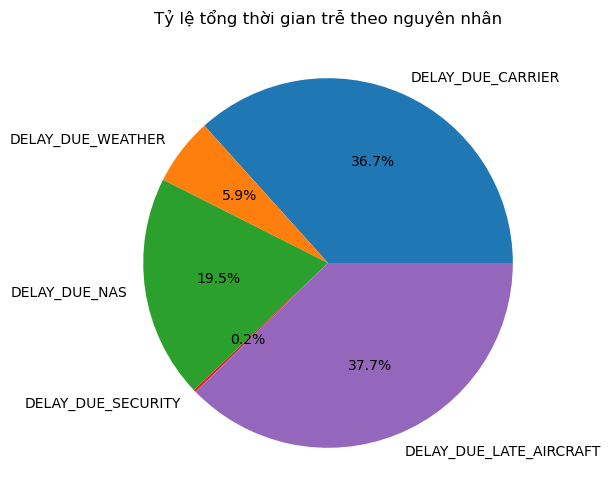

In [44]:
import re
import matplotlib.pyplot as plt

df_delay_due_to = df.filter(regex = r'^DELAY_DUE_', axis = 1)

ax = df_delay_due_to.sum().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), ylabel='')
plt.title('Tỷ lệ tổng thời gian trễ theo nguyên nhân')
plt.show()